# <h1 align="center" > 🎥📺**NETFLIX** - *Business Case study*📽️🍿
<kbd>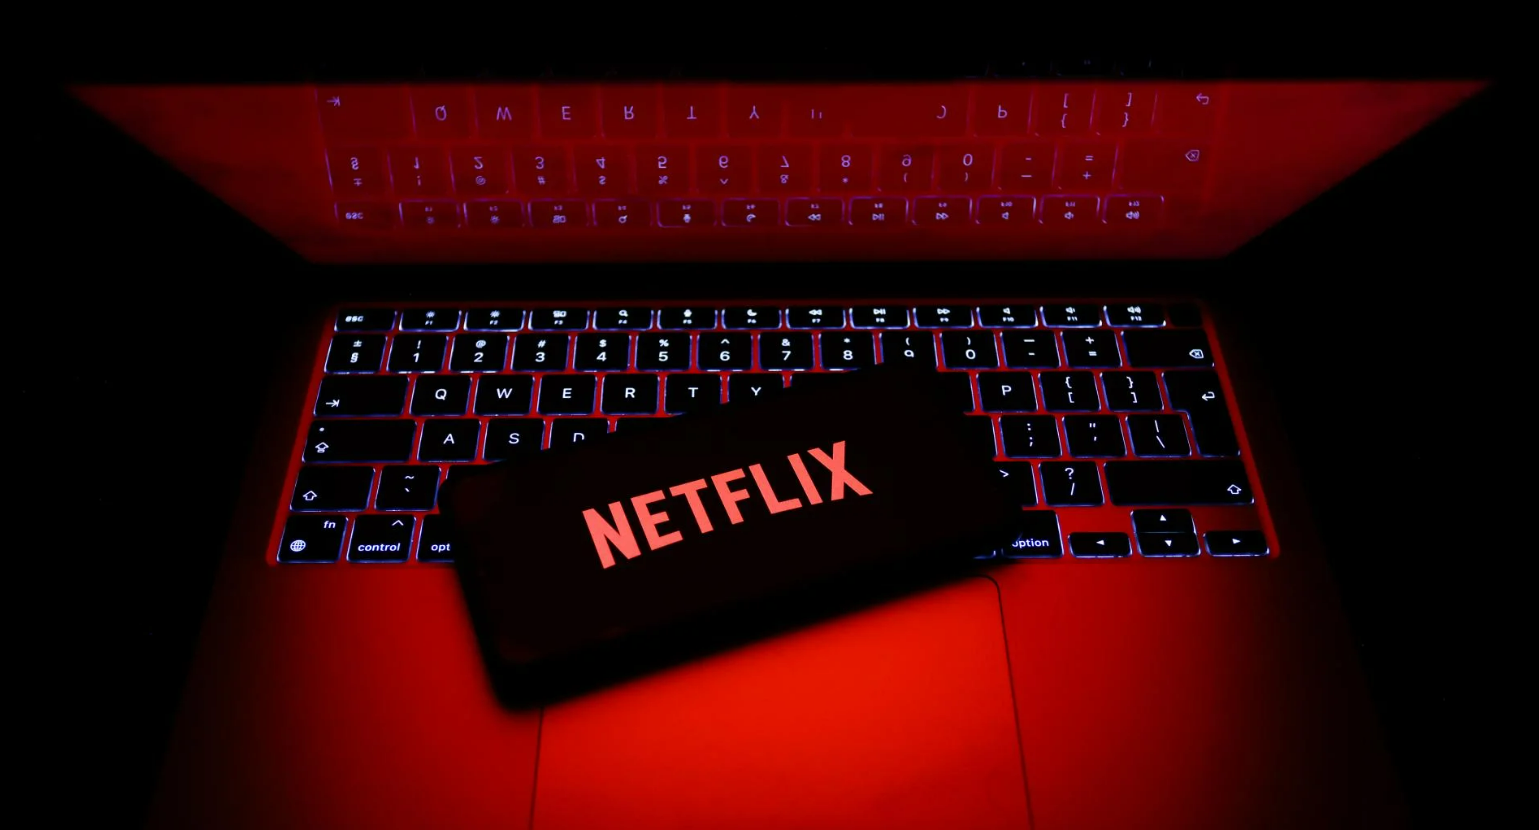</kbd>
    
## Introduction :

**Netflix** was founded in 1997 by `Reed Hastings` and `Marc Randolph`. The company started as a DVD-rental service, but it quickly transitioned to streaming in 2007. Netflix has grown rapidly over the past few decades, and it is now one of the most popular streaming services in the world. It is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. 

A brief overview of Netflix's growth over the years:

- 1997: Netflix is founded.
- 2000: Netflix introduces a subscription model for DVD rentals.
- 2007: Netflix launches its streaming service.
- 2011: Netflix surpasses Blockbuster as the leading DVD-rental company in the United States.
- 2013: Netflix expands to international markets.
- 2016: Netflix releases its first original series, House of Cards.
- 2019: Netflix surpasses 150 million subscribers worldwide.
- 2022: Netflix experiences its first decline in subscribers in the North American market.

As of July 2023, Netflix has a market capitalization of `$196.44 billion dollar`. 
This makes it the world's 56th most valuable company by market cap.

    

### Buisness Problem (EDA):
    This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploration of Data

In [2]:
df = pd.read_csv('netflix.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'netflix.csv'

In [ ]:
df.head(3)

In [ ]:
df.tail(4)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
df.describe(include='all')

In [ ]:
df.sample()

In [ ]:
df.dtypes

In [ ]:
df[df.duplicated()]

## 🖌️Data Wrangling

### 📚Unnesting the columns (directors , casts , countrys , listed_in)

In [ ]:
unnesting = ['director', 'cast', 'listed_in','country']
for column in unnesting:
    df[column] = df[column].str.split(', ')
    df = df.explode(column)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

#### 👉Insights : 
Note after unnesting the no.of movies and TvShows rows are increased but still we use nunique() instead of counts to get the accurate data...
- Movie      - 6131
- TV Show    - 2676
- Total      - 8807

#### Treating Nulls

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull())
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:
for i in df.columns:
    null_pct = (df[i].isna().sum() / df.shape[0]) *100
    if null_pct > 0 :
        print(f'Null_pct of {i} is {round(null_pct,3)} %')

In [ ]:
df[df.date_added.isna()]

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'] ,format="%B %d, %Y" , errors='coerce')

In [ ]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:
df.dtypes

In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.sample()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:
df[df.rating.isna() | df.duration.isna()]

In [ ]:
df["country"].fillna("Unknown",inplace=True)
df["cast"].fillna("Unknown actors",inplace=True)
df["director"].fillna("Unknown director",inplace=True)
df["rating"].fillna("Unknown",inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df[df.duration.isna()]

In [ ]:
df.rating.value_counts()

In [ ]:
rvc = df.rating.value_counts(dropna=False).reset_index()

In [ ]:
plt.figure(figsize=(14,5))
a = sns.barplot(rvc , x='rating' , y='count' , color='red' , width=0.3)
plt.title('Raw analysis of Ratings',fontsize=20,fontweight='bold')
a.bar_label(a.containers[0], label_type='edge')
plt.show()

In [ ]:
df[df.director=='Louis C.K.'] 

In [ ]:
# df['duration'] = df.loc[df.director=='Louis C.K.'].replace(np.nan , df.rating) didn't work
# df['duration'].fillna(df['rating'], inplace=True) # this works .. easy method .. but make sure the required rows alone change
df.loc[df['director']=='Louis C.K.', 'duration']=df.loc[df['director']=='Louis C.K.','duration'].fillna(df.loc[df['director'] == 'Louis C.K.', 'rating'])
# b4 line end => .fillna(df.loc[df['director'] == 'Louis C.K.', 'rating'])

In [ ]:
df[df.director=='Louis C.K.'] 

In [ ]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unknown'

In [ ]:
df[df.director=='Louis C.K.'] 

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

##### 📂we will segregate the data into movie data and tv-shows data and fill the duration appropriately...

In [ ]:
df.type.value_counts()

In [ ]:
movies_data = df[df.type=='Movie']

In [ ]:
movies_data.shape

In [ ]:
tvshows_data = df[df.type=='TV Show']

In [ ]:
tvshows_data.shape

In [ ]:
movies_data.sample()

In [ ]:
movies_data.isna().sum()

In [ ]:
tvshows_data.sample()

In [ ]:
tvshows_data.isna().sum()

In [ ]:
movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]
tvshows_data['no_of_seasons'] = tvshows_data['duration'].str.split(' ').str[0]

In [ ]:
movies_data.sample()

In [ ]:
movies_data.dtypes

In [ ]:
movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)

In [ ]:
movies_data.dtypes

In [ ]:
movies_data = movies_data.drop(columns=['description','duration']).reset_index(drop=True)

In [ ]:
movies_data.shape

In [ ]:
# movies data is done

In [ ]:
# tvshows.... 

In [ ]:
tvshows_data.tail()

In [ ]:
tvshows_data.no_of_seasons.value_counts()

In [ ]:
tvshows_data.dtypes

In [ ]:
tvshows_data.no_of_seasons = tvshows_data.no_of_seasons.astype(int)

In [ ]:
tvshows_data.no_of_seasons.dtypes

In [ ]:
tvshows_data = tvshows_data.drop(columns=['description','duration']).reset_index(drop=True)

In [ ]:
tvshows_data.sample(3)

In [ ]:
df = df.drop(columns=['description']).reset_index(drop=True)

In [ ]:
print(f'Cleaned Netflix data has {df.shape[0]} Rows and {df.shape[1]} Columns')
print(f'Netflix Movies data has {movies_data.shape[0]} Rows and {movies_data.shape[1]} Columns')
print(f'Netflix TV shows data has {tvshows_data.shape[0]} Rows and {tvshows_data.shape[1]} Columns')

In [ ]:
df.shape

In [ ]:
df.type.value_counts()

In [ ]:
plt.figure(figsize=(25,8), layout='tight').suptitle('Visual checks of Nulls',fontsize=20,fontweight="bold",fontfamily='serif')


plt.subplot(1,3,1)
sns.heatmap(df.isnull())
plt.title('cleaned Netflix data Nulls',fontsize=12)
plt.xlabel('metrics',fontsize=12)
plt.ylabel('row_numbers',fontsize=12)

plt.subplot(1,3,2)
sns.heatmap(movies_data.isnull())
plt.title('Movies data Nulls',fontsize=12)
plt.xlabel('metrics',fontsize=12)
plt.ylabel('row_numbers',fontsize=12)


plt.subplot(1,3,3)
sns.heatmap(tvshows_data.isnull())
plt.title('Tv Shows data Nulls',fontsize=12)
plt.xlabel('metrics',fontsize=12)
plt.ylabel('row_numbers',fontsize=12)

plt.show()

#### 👉Insights:
- 👆🏽 Red color indicates data has 0 % nulls in all columns

In [ ]:
# saving the files for further analysis:

df.to_csv('netflix_cleaned_data.csv',sep=',',index=False)
movies_data.to_csv('cleaned_movies_data.csv',sep=',',index=False)
tvshows_data.to_csv('cleaned_tvshows_data.csv',sep=',',index=False)

# Exploratory Data Analysis (EDA):

In [ ]:
nx = pd.read_csv('netflix_cleaned_data.csv')
md = pd.read_csv('cleaned_movies_data.csv')
tvd = pd.read_csv('cleaned_tvshows_data.csv')

#### 📌Q. How are contents distributed in Netflix Platform ?

In [ ]:
pg = nx.groupby('type')['show_id'].nunique()
pg

In [ ]:
pgdf = pg.reset_index()
pgdf

In [ ]:
plt.figure(figsize=(13.5,4))
font = {'weight':'bold',
        'family':'serif'}
plt.suptitle("Netflix Contents Distribution",fontdict=font,fontsize=20)

plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
plt.pie(pg,
        labels=pg.index,
        startangle=80, explode=(0.08,0), colors=['red','#dedede'],
        shadow=True, autopct='%1.1f%%',textprops={'color':"k"})

plt.subplot(1,2,2)
a = sns.barplot(y=pgdf.show_id , data=pgdf , x=pgdf.type , palette=['red','#dedede'])
a.bar_label(a.containers[0], label_type='edge')
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('')


plt.show()

#### 👉Insights : 

- we can clearly interpret that nearly *70%* contents are `Movies` whereas *30%* are `Tvshows` contents in **Netflix** content library.


#### 📌Q. Outliers check: 

In [ ]:
plt.figure(figsize=(16,6))
font = {'weight':'bold',
        'family':'serif'}
plt.suptitle("Netflix Contents Distribution",fontweight='bold',fontsize=20)

plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
sns.violinplot(nx,x='type',y='release_year',palette=['red','#dedede'])
sns.despine()
plt.xlabel('')
plt.title(" Violin Distribution",fontdict=font,fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(nx,x='type',y='release_year',palette=['red','#dedede'])
sns.despine()
plt.xlabel('')
plt.title("Box & Whisker Distribution",fontdict=font,fontsize=14)

plt.show()

#### 👉Insights : 

- Here we can easily identify that the contents released before 1960 are the outliers.
--------------------------------

#### 📌Q. In which year maximum contents got released ?

In [ ]:
ryvc = nx.release_year.value_counts()[:20]

In [ ]:
plt.figure(figsize=(13,5))
plt.style.use('seaborn-v0_8-bright')
sns.countplot(nx , y='release_year' , order = ryvc.index , palette=['red','dimgrey'] , width=0.2)
sns.despine(bottom=True)
plt.xticks([])
plt.xlabel('')
plt.title('Years With Maximum contents Released',fontsize=16,fontweight='bold',fontfamily='serif')
plt.show()

#### 👉Insights :

- Netflix began enlarging their contents library from 2000 and acquired maximum contents so far in `2018` followed by `2019`&`2017`. 
--------------------------------

#### 📌Q. What are the top 15 countries consumption of movies and tvshows ? 

In [ ]:
# countrywise content count with movies_data
cm = md.groupby('country')[['show_id']].nunique().sort_values(by='show_id',ascending=False)
cm = cm[:15]
cwm = cm[cm.index!=('Unknown')]
cwm

In [ ]:
# countrywise content count with tvshows_data
ctv = tvd.groupby('country')[['show_id']].nunique().sort_values(by='show_id',ascending=False)
cwtv = ctv[:15]
cwtv = cwtv[cwtv.index!=('Unknown')]
cwtv

In [ ]:
# Graphical Analysis
plt.figure(figsize=(16,6))
plt.suptitle('Countries consuming Movies & TV Shows',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('seaborn-v0_8-bright')

c1 = sns.barplot(cwm, x=cwm.index , y=cwm.show_id,
                 color='red' , width=0.4 , label='Movies_count')
#c1.bar_label(c1.containers[0], label_type='edge',color='r')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Content count',fontsize=12)
plt.legend(loc='upper right')
plt.xticks(rotation=30)

c2 = sns.barplot(cwtv, x=cwtv.index , y=cwtv.show_id,
                 color='dimgray' , width=0.2 , label='Tvshows_count')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Content count',fontsize=12)
plt.legend(loc='upper right')
plt.xticks(rotation=30)

top_n = 14
for i in range(top_n):
    c1.annotate(cwm.show_id[i], (i+0.12, cwm.show_id[i]+50),
                ha='left', va='baseline',color='red')
    
for i in range(top_n):
    c2.annotate(cwtv.show_id[i], (i+0.22, cwtv.show_id[i]),
                ha='left', va='baseline', color='dimgrey')
    
plt.show()

#### 👉Insights :

- The top 5 countries with the highest count of Movies and TV Shows are aiding in recognizing the key players in TV show production and Movies production.
- We can infer that `US` , `India` , `UK` , `France` , `Canada` , `Japan` are the top entertainment consumers while other countries significantly contribute to the OTT content library.

----------------------------------


#### 📌Q. How much contents are added every year in netflix ? 

In [ ]:
yc = nx.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
yc.sort_values(by='show_id',ascending=False)

In [ ]:
yc['show_id'].sum()

In [ ]:
ycm = md.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
ycm

In [ ]:
ycm['show_id'].sum()

In [ ]:
yctv = tvd.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
yctv

In [ ]:
yctv['show_id'].sum()

**MULTIVARIATE ANALISYS: Type by year_added** 

In [ ]:
plt.figure(figsize=(16,6))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
c = sns.barplot(data = yc, x = 'year_added' , y = 'show_id' ,
                hue = 'type', palette=['red','dimgrey'] , width=0.35)
plt.title('Contents added to Netflix Yearwise',
          fontsize=16,fontweight="bold",fontfamily='serif')
c.bar_label(c.containers[0], label_type='edge',color='red')
c.bar_label(c.containers[1], label_type='edge',color='dimgray')
plt.legend(loc='upper left')
plt.show()

#### 👉Insights :
**Netflix**'s content acquisition strategy over time.
- The bar plot shows the distribution of content added to Netflix across different years.
- There appears to be an increasing trend in the total number of content items added to Netflix over the years.
- The bars tend to get taller as you move from left to right, suggesting that Netflix has been continuously expanding its content library.
- The variation in bar heights from year to year highlights how Netflix's content strategy has evolved. 
- Some years show significant spikes, while others have lower counts, indicating variations in content acquisition.
--------------------------------------

#### 📌Q. How much contents gets released every year ?

In [ ]:
mr = md.groupby('release_year')[['title']].nunique()
mr = mr.reset_index()
mr

In [ ]:
mr.title.sum()

In [ ]:
tvr = tvd.groupby('release_year')[['title']].nunique()
tvr = tvr.reset_index()
tvr

In [ ]:
tvr.title.sum()

**UNIVARIATE ANALISYS**

In [ ]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.lineplot(data=mr , x='release_year' , y='title' , color='r' ,
             label = 'Movies', marker='d')
sns.lineplot(data=tvr , x='release_year' , y='title' , color='dimgrey',
             label='Tv Shows' , marker='d')
plt.title('Contents Released count Yearwise',fontsize=16,
                      fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(30,10) , dpi=250)
plt.suptitle('Yearly Release of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

mr= mr[mr.release_year>2000]
plt.subplot(1,2,1)
c = sns.barplot(mr , x = 'release_year' , y='title', color='tomato',width=0.98)
c.bar_label(c.containers[0], label_type='edge',color='r')
sns.pointplot(mr , x='release_year' , y='title' , color='r')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Movies Counts", fontsize=12)
plt.title("Year of Movies Release", fontsize=16,fontweight="bold",fontfamily='serif')

plt.subplot(1,2,2)
d = sns.histplot(x = tvr.release_year, bins = 10, kde = True, 
             color='dimgrey' , edgecolor ='dimgrey')
d.bar_label(d.containers[0], label_type='edge',color='dimgrey')
plt.xlabel('Year',fontsize=12)
plt.ylabel("TV Show Counts", fontsize=12)
plt.title("Year of TV show Release", fontsize=16,fontweight="bold",fontfamily='serif')

plt.show()

In [ ]:
mr.dtypes

In [ ]:
plt.figure(figsize=(30,10) , dpi=250)
plt.suptitle('Yearly Release of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1) 
sns.boxplot(md , x= 'release_year', color='red')
sns.despine()
plt.title('Movie Releases',fontsize=16,fontfamily='serif')

plt.subplot(1,2,2)
sns.boxplot(tvr , x= 'release_year', color='dimgrey')
sns.despine(left=True)
plt.title('Tvshow Releases',fontsize=16,fontfamily='serif')

plt.show()

In [ ]:
sns.jointplot(nx , x='year_added' , y='release_year' , hue='type' , 
                      palette=['red','dimgrey'])
plt.show()

#### 👉Insights :

- The plot uses two distinct lines in different colors (red for movies and dimgrey for TV shows) to enable a side-by-side comparison.
- The plot reveals that Movies has been more dominant in terms of release counts in any given year and in the recent past audience focus shifts on watching web series. 
- The dominance of movies and TV shows over the years can indicate changing audience preferences, industry trends and Netflix's strategic decisions.
- Netflix has been continuously expanding its content library, offering more choices to its subscribers.
---------------

#### 📌Q. How the contents genre segregated ? 

In [ ]:
mg = md.groupby(['listed_in'])[['title']].nunique().sort_values(by='title',ascending=False)
mg = mg.reset_index()
mg

In [ ]:
tvg = tvd.groupby(['listed_in'])[['title']].nunique().sort_values(by='title',ascending=False)
tvg = tvg.reset_index()
tvg

In [ ]:
plt.figure(figsize=(25,10))
plt.suptitle('Popular Genre Contents count',fontsize=20,
             fontweight="bold",fontfamily='cursive')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,2)
sns.barplot(mg , x='title' , y='listed_in' , color='red' , width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Movie Genre',fontsize=16)
plt.xlabel('Movies count')
plt.xticks([])
n=20
for i in range(n):
    plt.annotate(mg.title[i], (mg.title[i]+75,i+0.2),
                 ha='center' , va='bottom' , color='r')

plt.subplot(1,2,1)
sns.barplot(tvg , x='title' , y='listed_in' , color='dimgrey' , width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Tv Show Genre',fontsize=16)
plt.xlabel('TvShows count')
plt.xticks([])
nn=22
for i in range(nn):
    plt.annotate(tvg.title[i], (tvg.title[i]+45,i+0.2),
                 ha='center' , va='bottom' , color='dimgrey')

plt.show()

**Genre-WordCloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(16,4))
plt.suptitle('Popular Genre Contents in Word Cloud',
             fontsize=16,fontweight="bold",fontfamily='fantasy')
plt.style.use('default')
plt.style.use('dark_background')

plt.subplot(1,2,1)
mgwc = WordCloud(width=1600, height=800, background_color='black',
                 colormap='Reds').generate(md.listed_in.to_string())
plt.imshow(mgwc)
plt.axis('off')
plt.title("Movie Genre",fontsize=14,fontweight='bold',fontfamily='serif')

plt.subplot(1,2,2)
tvgwc = WordCloud(width=1600, height=800, background_color='black',
                  colormap='Greys').generate(tvd.listed_in.to_string())
plt.imshow(tvgwc)
plt.axis('off')
plt.title("Tv Shows Genre",fontsize=14,fontweight='bold',fontfamily='serif')

plt.show()

#### 👉Insights :

- The plot illustrates the popularity of various genres in Movies and TV Shows on the platform.
- Here, we can see that `Hollywood contents` , `Dramas` , `Comedies` are the Top and Evergreen genres
- The plot provides insights into audience preferences, indicating which genres are more prevalent in Movies and TV Shows.
-----------

#### 📌Q. what genre's are more preferred by directors ?

In [ ]:
mdgc = md.groupby('listed_in')['director'].nunique().sort_values(ascending=False)
mdgc

In [ ]:
tvdgc = tvd.groupby('listed_in')['director'].nunique().sort_values(ascending=False)
tvdgc

In [ ]:
plt.figure(figsize=(25, 12))
plt.suptitle('Directors popular Genre Contents',
                fontsize=20,fontweight="bold",fontfamily='cursive')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
a = sns.barplot(y=mdgc.index, x=mdgc.values, color='r',width=0.3)
a.bar_label(a.containers[0], label_type='edge',color='r')
plt.title('Movie Directors comfy Genre\'s',fontsize=20,
                  fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)
plt.ylabel('Genre')
plt.xticks([])

plt.subplot(1,2,2)
a = sns.barplot(y=tvdgc.index, x=tvdgc.values, color='dimgrey',width=0.3)
a.bar_label(a.containers[0], label_type='edge',color='dimgrey')
plt.title('TvShow Directors comfy Genre\'s',fontsize=20,
                  fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)
plt.ylabel('')
plt.xticks([])
plt.show()

#### 👉Insights:

- The diversity of genre that the directors are more comfortable indicates that Netflix has content on all genres in its library.
- The top genres with the most directors are International Movies, Dramas, Comedies, Documentaries, Independent Movies, and Action & Adventure.
----------

#### 📌Q. What are genres more preferred in each country ?  

In [ ]:
plt.figure(figsize=(20, 8))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')


given_country = input("Enter your preferred Choice of Country : ")

mcountry = md[md["country"] == given_country]
tvcountry = tvd[tvd["country"] == given_country]

mc_data = mcountry.groupby(['listed_in','type'])[['show_id']].nunique()
mc_data = mc_data.sort_values(by=["show_id"],ascending = False).reset_index()

mtv_data = tvcountry.groupby(['listed_in','type'])[['show_id']].nunique()
mtv_data = mtv_data .sort_values(by=["show_id"],ascending = False).reset_index()


plt.suptitle('Genre Distribution across the selected Country'
             ,fontsize=20,fontweight="bold",fontfamily='serif')

plt.subplot(1,2,1)
a = sns.barplot(mc_data , y='listed_in', x='show_id',color='red',width = 0.2)
a.bar_label(a.containers[0], label_type='edge',color='r')
plt.title('Movie Genre Distribution')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Count of Contents')
plt.xticks(rotation=90, ha = 'center',fontsize = 8)
plt.yticks(fontsize =8)

plt.subplot(1,2,2)
b = sns.barplot(mtv_data , y='listed_in', x='show_id',color='dimgrey',width = 0.2)
b.bar_label(b.containers[0], label_type='edge',color='dimgrey')
sns.despine(bottom=True,left=True)
plt.title('TvShows Genre Distribution')
plt.xlabel('')
plt.xticks([])
plt.ylabel('')
plt.xticks(rotation=90, ha = 'center',fontsize = 8)
plt.yticks(fontsize =8)

plt.show()

#### 📌Q. How are contents distributed based on Runtime & Seasons ?

In [ ]:
tvd.groupby(['no_of_seasons'])[['title']].nunique().sum()

In [ ]:
md.groupby(['runtime_in_mins'])[['title']].nunique().sum()

In [ ]:
mrt = md.groupby(['runtime_in_mins'])[['title']].nunique().sort_values(by='title',ascending=False)
mrt = mrt.reset_index()
mrt

In [ ]:
tvs = tvd.groupby(['no_of_seasons'])[['title']].nunique().sort_values(by='title',ascending=False)
tvs = tvs.reset_index()
tvs

In [ ]:
plt.figure(figsize=(25,13))
plt.suptitle('Length of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(2,1,1)
sns.lineplot(mrt , y='title' , x='runtime_in_mins' , color='red' , marker='d')
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Movie runtime\n' ,fontsize=12,fontweight="bold")
plt.ylabel('Movies count')
plt.text(205,123,'It is seen that the most optimum\nduration for a content is',
         fontsize=14,fontfamily='sans-serif')
plt.text(248,122,'90-120 Minutes',color='r',
         fontsize=14,fontfamily='fantasy',fontweight='bold')
max_value = mrt.title.max()
max_x = mrt[mrt.title == max_value]['runtime_in_mins'] 
sns.scatterplot(x=max_x, y=max_value, color='#dedede', marker='s', s=10000)

plt.subplot(2,1,2)
sns.barplot(tvs , y='title' , x='no_of_seasons' , color='dimgrey' , width=0.3)
sns.despine()
plt.title('------------------------------\n Tv Shows Seasons',
          fontsize=12,fontweight="bold")
plt.ylabel('TvShows count')
n=15
for i in range(n):
     plt.annotate(tvs.title[i], (i+0.2,tvs.title[i]+45),
                  ha='center' , va='bottom' , color='dimgrey')

plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.suptitle('Length of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')

plt.subplot(1,2,1)
sns.histplot(x = md.runtime_in_mins, bins = 200, color='red',
            kde = True, edgecolor = 'salmon')
plt.xlabel("Movie Duration in mins",fontsize=12)
plt.ylabel("Movies Counts", fontsize=12)
plt.title("Duration of Movies", fontsize=14)

plt.subplot(1,2,2)
b = sns.histplot(x = tvd.no_of_seasons, bins = 10, kde = True, 
             color='dimgrey' , edgecolor ='k')
b.bar_label(b.containers[0], label_type='edge',color='dimgrey')
plt.xlabel('No.of Seasons',fontsize=12)
plt.ylabel("TV Show Counts", fontsize=12)
plt.title("Duration of TV shows", fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(18,8) , dpi=250)
plt.suptitle('Contents Duration',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(2,2,1)
sns.boxplot(md , x ='runtime_in_mins', color='red',showfliers=True)
plt.title('Movies',fontsize=16,fontfamily='serif')

plt.subplot(2,2,3)
sns.boxplot(mrt , x='title', color='red')

plt.subplot(2,2,2)
sns.boxplot(tvd , x= 'no_of_seasons', color='dimgrey')
plt.title('TvShows',fontsize=16,fontfamily='serif')

plt.subplot(2,2,4)
sns.boxplot(tvs , x='title', color='dimgrey')
sns.despine(left=True,trim=True)

plt.show()

In [ ]:
sns.jointplot(nx , x='release_year' , 
              y='duration' , hue='type' , 
              palette=['red','dimgrey'])
plt.text(1948,320,'Overall Duration Comparison \n with release year',color='dimgrey',
         fontsize=12,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(nx , x='year_added' , 
              y='duration' , hue='type' , 
              palette=['red','dimgrey'])
plt.text(2007,300,'Overall Duration Comparison \n with uploaded year',color='red',
         fontsize=12,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(md , y='release_year' , x='runtime_in_mins' , color='red')
plt.text(35,2022.5,'Movies Duration Comparison with release year',
                 color='dimgrey',fontsize=9,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(md , x='date_added' , y='runtime_in_mins' , color='red')
plt.text(50,320,'Movies Duration Comparison with uploaded date',
                 color='dimgrey',fontsize=9,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(md , y='release_year' , x='runtime_in_mins' , color='red')
plt.text(30,2022.4,'TvShows Comparison by release year',color='dimgrey',fontsize=12,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(md , x='date_added' , y='runtime_in_mins' , color='red')
plt.text(35,290,'TvShows Comparison by uploaded_date',color='dimgrey',fontsize=12,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(tvd , x='release_year' , y='year_added' , color='dimgrey')
plt.text(1930,2021.3,'TvShows Comparison by release year',color='red',fontsize=12,fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(tvd , y='release_year' , x='no_of_seasons' , color='dimgrey')
plt.text(2,2022.8,'TvShows Comparison by release year',
             color='red',fontsize=12,fontweight='bold')
plt.show()

#### 👉Insights :

- The majority of movies appear to have a runtime around **90-120** `minutes` . This is evident from the peak in the red line plot having highlighted the maximum value (maximum movie count) using a large silver square marker
- In the TV shows, there are a higher number of TV shows with a smaller number of seasons (e.g., **1-3** `seasons`), and the counts gradually decrease as the number of seasons increases.
------------

#### 📌Q. What are the ratings given for the contents uploaded on netflix ?

In [ ]:
md.groupby(['rating'])[['title']].nunique().sum()

In [ ]:
tvd.groupby(['rating'])[['title']].nunique().sum()

In [ ]:
movie_rating = md.groupby(['rating'])[['title']].nunique().reset_index()
movie_rating = movie_rating.sort_values(by='title',ascending=False)
movie_rating

In [ ]:
tv_rating = tvd.groupby(['rating'])[['title']].nunique().reset_index()
tv_rating = tv_rating.sort_values(by='title',ascending=False)
tv_rating

In [ ]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
sns.lineplot(data=movie_rating , x='rating' , y='title' , color='r' , label = 'Movies', marker='s')
sns.lineplot(data=tv_rating , x='rating' , y='title' , color='dimgrey', label='Tv Shows' , marker='o')
plt.title('Ratings of the Contents Released',fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper right')
plt.show()

#### 👉Insights :
*MOVIES*
- The most common content rating is "TV-MA," with a total of 2,062 contents , typically associated with content intended for mature audiences.
- "TV-14" is the second most common rating, with 1,427 content count indicating content suitable for viewers aged 14 and older.
- "Restricted: R - Under 17 requires accompanying parent or adult guardian" is the third most common rating, with 797 titles.

*TV SHOWS*
- The "TV-MA" rating with 1,145 titles suggests that a significant portion of the content is intended for mature audiences.
- "TV-14" is the second most common rating, with 733 titles indicates that contents are for viewers aged 14 and older.
- "TV-PG" - parental guidance is recommended stands third with 323 contents in Tv programs.
------------

#### 📌Q. Diversify the actors with more contents ?

In [ ]:
movies_cast = md.groupby('cast')[['title']].nunique().sort_values(by='title',ascending=False)[1:20]
movies_cast

In [ ]:
tv_cast = tvd.groupby('cast')[['title']].nunique().sort_values(by='title',ascending=False)[1:20]
tv_cast

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle('Actors with more Contents',
             fontsize=20,fontweight="bold",fontfamily='serif',color='k')
plt.style.use('Solarize_Light2')

plt.subplot(2,1,1)
c1 = sns.barplot(movies_cast, y=movies_cast.index , x='title',color='red',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Actors with more Movie Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
plt.xticks([])
plt.yticks(fontweight='bold')
plt.xlabel('')
plt.ylabel('Actors',fontsize=12)
for i in range(19):
    c1.annotate((str(movies_cast.title[i])+' movies'), (movies_cast.title[i]+1,i+0.3),
                ha='center' , va='bottom' , color='red')

plt.subplot(2,1,2)
c2 = sns.barplot(tv_cast, y=tv_cast.index , x='title',color='dimgrey',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('\n Actors with more TvShows Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='dimgray')
plt.xticks([])
plt.xlabel('')
plt.yticks(fontweight='bold')
plt.ylabel('Actors',fontsize=12)
for i in range(19):
    c2.annotate((str(tv_cast.title[i])+' shows'), (tv_cast.title[i]+0.63,i+0.3),
                ha='center' , va='bottom' , color='dimgrey')

plt.show()

#### 👉Insights:-
*Movies*
- `Anupam Kher` has appeared in the most movies (42) followed by `Shah Rukh Khan` follows closely with 35 movies, establishing himself as a prominent figure in the industry.
- `Naseeruddin Shah`, `Om Puri`, and `Akshay Kumar` all have 30 movies, indicating their significant presence in the film industry.
- Several actors and actresses, including Paresh Rawal, Julie Tejwani, Amitabh Bachchan, Rupa Bhimani, and Boman Irani, have been featured in a substantial number of movies (ranging from 27 to 28),
- The list includes actors from different film industries and countries. For instance, Samuel L. Jackson and Nicolas Cage are prominent actors from Hollywood, while others are from the Indian film industry.
- This diversity in the list reflects the global nature of the entertainment industry.

*TvShows*
- `Takahiro Sakurai` stands out as the Voice actor with the highest count of shows (25), indicating a prolific career in the field.
- `Yuki Kaji`, `Junichi Suwabe`, `Daisuke Ono`, and `Ai Kayano` all have significant counts, ranging from 17 to 19 titles, demonstrating their prominence in the acting industry.
- Both Japanese voice actors (seiyuu) and international actors like David Attenborough and Vincent Tong are recognized for their work in different contexts and markets.
- Many of the voice actors listed are well-known and popular among anime and animation enthusiasts.
---------------

#### 📌Q. How much contents are being delivered by directors to content library?

In [ ]:
fmd = md.groupby('director')[['show_id']].nunique()
fmd = fmd.sort_values(by='show_id',ascending=False)[1:21]
fmd

In [ ]:
ftvd = tvd.groupby(['director'])[['show_id']].nunique()
ftvd= ftvd.sort_values(by='show_id',ascending=False)[1:21]
ftvd

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle('Directors with more Contents',
             fontsize=20,fontweight="bold",fontfamily='serif',color='k')
plt.style.use('Solarize_Light2')

plt.subplot(2,1,1)
c1 = sns.barplot(fmd, y=fmd.index , x='show_id',color='red',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Directors with more Movie Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
plt.xticks([])
plt.yticks(fontweight='bold')
plt.xlabel('')
plt.ylabel('Directors',fontsize=12)
for i in range(20):
    c1.annotate((str(fmd.show_id[i])+' movies'), (fmd.show_id[i]+0.53,i+0.3),
                ha='center' , va='bottom' , color='red')

plt.subplot(2,1,2)
c2 = sns.barplot(ftvd, y=ftvd.index , x='show_id',color='dimgrey',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('\n Directors with more TvShows Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='dimgray')
plt.xticks([])
plt.xlabel('')
plt.yticks(fontweight='bold')
plt.ylabel('Directors',fontsize=12)
for i in range(20):
    if ftvd.show_id[i]>1:
        c2.annotate((str(ftvd.show_id[i])+' shows'),(ftvd.show_id[i]+0.07,i+0.3),
                    ha='center' , va='bottom' , color='dimgrey')
    else:
        c2.annotate((str(ftvd.show_id[i])+' show'),(ftvd.show_id[i]+0.07,i+0.3),
                    ha='center' , va='bottom' , color='dimgrey')
plt.show()

#### 👉Insights:-
*Movies*
- `Rajiv Chilaka` is the filmmaker with the highest number of movies, having directed 22 films. This shows a long and prolific career in filmmaking career and he is the `CEO of GREEN GOLD ANIMATIONS` - Movies like ChottaBheem series,chorr police attracted a huge audiences.
- `Jan Suter` and `Raúl Campos` also have impressive directorial careers, with 21 and 19 movies, respectively.
- This includes directors from various countries, such as `India` (Rajiv Chilaka, Suhas Kadav, David Dhawan), the `United States` (Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Steven Spielberg, Don Michael Paul, Shannon Hartman, Troy Miller), `Egypt` (Youssef Chahine), and more.


*TvShows*
- Some directors have worked on multiple shows. For example, `Ken Burns` and `Alastair Fothergill` have directed three shows each, making them prolific in their contributions to these projects.
- The list of directors includes individuals from various backgrounds and countries, such as the `United States` (Ken Burns, Stan Lathan, Joe Berlinger, Lynn Novick, Rob Seidenglanz, Norm Hiscock, Oliver Stone), `South Korea` (Shin Won-ho), `India` (Gautham Vasudev Menon), `Italy` (Iginio Straffi), and more. This reflects the international reach and diversity of directors in the entertainment industry.
- Directors like **Ken Burns, Alastair Fothergill, and Lynn Novick** have been involved in multiple projects, indicating their impact on the world of documentaries and shows. 
---------

#### 📌Q. Who is the Actor-Directors worked with each other the most ?

In [ ]:
ad = nx[['cast','show_id','director','type']]
ad = ad[ad.cast!='Unknown actors']
ad = ad[ad.director!='Unknown director']
ad = ad.drop_duplicates().reset_index(drop=True)
ad

In [ ]:
nad = ad.groupby(['cast','director','type'])[['show_id']].nunique()
new_ad = nad.reset_index().sort_values(by='show_id',ascending=False)
new_ad['ad_pair'] = new_ad['cast']+'-'+new_ad['director']
new_ad

In [ ]:
mad = new_ad[new_ad.type=='Movie']
tvad = new_ad[new_ad.type=='TV Show']

In [ ]:
mad.info()

In [ ]:
mad = mad[['ad_pair','show_id']]
mad

In [ ]:
tvad = tvad[['ad_pair','show_id']]
tvad

In [ ]:
mad.dtypes

In [ ]:
fmad = mad[:25].set_index('ad_pair')
ftvad = tvad[:25].set_index('ad_pair')

In [ ]:
fmad

In [ ]:
ftvad

In [ ]:
plt.figure(figsize=(19, 15))
plt.suptitle('Actor - Director pairs',fontsize=20,
                 fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('Solarize_Light2')

plt.subplot(2,1,1)
a1 = sns.barplot(y=fmad.index, x=fmad.show_id, color='red',width=0.3)
plt.title('Movie Directors-Actors Combo',fontsize=12,fontweight="bold")
sns.despine(left=True,bottom=True,trim=True)
plt.yticks(fontweight='bold')
plt.xticks([])
plt.xlabel('No.of times worked together')
for i in range(25):
    a1.annotate((str(fmad.show_id[i])+' times'), (fmad.show_id[i]+0.47,i+0.5),
                ha='center' , va='bottom' , color='red')

plt.subplot(2,1,2)
a2 = sns.barplot(ftvad , y=ftvad.index, x=ftvad.show_id, color='dimgrey',width=0.3)
plt.title('TvShow Directors-Actors Combo',fontsize=12,fontweight="bold")
sns.despine(left=True,bottom=True,trim=True)
plt.yticks(fontweight='bold')
plt.xticks([])
plt.xlabel('No.of times worked together')
for i in range(25):
    if ftvad.show_id[i]>1:
        a2.annotate((str(ftvad.show_id[i])+' times'), (ftvad.show_id[i]+0.07,i+0.2),
                ha='center' , va='bottom' , color='dimgrey')
    else:
        a2.annotate((str(ftvad.show_id[i])+' time'), (ftvad.show_id[i]+0.07,i+0.3),
                ha='center' , va='bottom' , color='dimgrey')
    
plt.show()

#### 👉Insights :

- `Rajiv Chilaka`,`SS.Rajamouli`&`Gautam vasudev Menon` are the most comfortable directors to work with and has the high number repeat rate by which we can interpret that they are success combo to repeat both contentwise and financial profit yielding.
- similary `David attenborough-Alister Fothergill` and `Houko Kuwashima-Toshiya Shinohara` are repeat combos and yet they are successful repeat combos.
-----------

#### 📌Q. What is the best time to launch a movie?

In [ ]:
md.columns

In [ ]:
movie_release = md[['show_id','title','date_added']]
movie_release = movie_release.reset_index(drop=True)
movie_release

In [ ]:
movie_release.dtypes

In [ ]:
movie_release['date_added'] = pd.to_datetime(movie_release['date_added'])

In [ ]:
movie_release.dtypes

In [ ]:
movie_release.isna().sum()

In [ ]:
movie_release['week_uploaded'] = movie_release['date_added'].dt.isocalendar().week
movie_release['uploaded_weekday'] = movie_release['date_added'].dt.strftime('%A')
movie_release['uploaded_month'] = movie_release['date_added'].dt.strftime('%B')

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
movie_release['uploaded_month']= pd.Categorical(movie_release['uploaded_month'],
                                            categories=month_order, ordered=True)

In [ ]:
movie_release

In [ ]:
week_movie_release=movie_release.groupby('week_uploaded')['show_id'].nunique()
week_movie_release=week_movie_release.reset_index()
week_movie_release

In [ ]:
week_movie_release.sum()

In [ ]:
monthly_movie_release=movie_release.groupby('uploaded_month')['show_id'].nunique()
monthly_movie_release = monthly_movie_release.reset_index()
monthly_movie_release = monthly_movie_release.sort_values(by='uploaded_month')
monthly_movie_release.reset_index(drop=True)
monthly_movie_release

In [ ]:
monthly_movie_release.title.sum()

In [ ]:
movies_release_pivot = movie_release.pivot_table(index='uploaded_month', 
                                                 columns='uploaded_weekday', 
                                                 values='show_id', 
                                                 aggfunc=pd.Series.nunique)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday','Sunday']
movies_release_pivot = movies_release_pivot[day_order]
movies_release_pivot

In [ ]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(movies_release_pivot, cmap='Reds',
                annot=True, fmt='d' , linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",
              fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [ ]:
movies_release_pivot.sum().sort_values(ascending=False)

In [ ]:
movies_release_pivot.sum().sum()

#### 📌Q. What is the best time to launch a Tvshow ?

In [ ]:
tvs_release = tvd[['show_id','title','date_added']]
tvs_release = tvs_release.reset_index(drop=True)
tvs_release

In [ ]:
tvs_release.dtypes

In [ ]:
tvs_release.isna().sum()

In [ ]:
tvs_release['date_added'].fillna(tvs_release['date_added'].mode()[0],inplace=True)

In [ ]:
tvs_release['date_added'] = pd.to_datetime(tvs_release['date_added'])

In [ ]:
tvs_release['date_added'].dtypes

In [ ]:
tvs_release['week_uploaded'] = tvs_release['date_added'].dt.isocalendar().week
tvs_release['uploaded_weekday'] = tvs_release['date_added'].dt.strftime('%A')
tvs_release['uploaded_month'] = tvs_release['date_added'].dt.strftime('%B')

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
tvs_release['uploaded_month']= pd.Categorical(tvs_release['uploaded_month'],
                                    categories=month_order, ordered=True)

In [ ]:
tvs_release

In [ ]:
tvs_release.groupby('week_uploaded')['show_id'].nunique().sum()

In [ ]:
week_release = tvs_release.groupby('week_uploaded')['show_id'].nunique()
week_release = week_release.reset_index()
week_release

In [ ]:
month_release = tvs_release.groupby('uploaded_month')['show_id'].nunique()
month_release = month_release.reset_index()
month_release

In [ ]:
month_release.show_id.sum()

In [ ]:
tvs_release_pivot = tvs_release.pivot_table(
            index='uploaded_month' , 
            columns='uploaded_weekday' , 
            values='show_id' , 
            aggfunc=pd.Series.nunique
    ) 

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday','Sunday']
tvs_release_pivot = tvs_release_pivot[day_order]
tvs_release_pivot

In [ ]:
tvs_release_pivot.sum(axis=1)

In [ ]:
tvs_release_pivot.sum().sort_values(ascending=False)

In [ ]:
tvs_release_pivot.sum().sum()

In [ ]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(tvs_release_pivot, cmap='Greys', annot=True, 
                fmt='d' , linewidth=0.1)
plt.title("TvShows Releases by Weekday and Month",
                  fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [ ]:
plt.figure(figsize=(30,15))
plt.suptitle('Releases Broader view',fontfamily='serif',
                         fontsize=20,fontweight='bold')

plt.subplot(2,2,1)
sns.pointplot(week_movie_release ,x='week_uploaded' , y='show_id' ,color='r')
plt.title('Movie Weekly Releases count',fontfamily='serif',
                      fontsize=16,fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('no.of contents released')

plt.subplot(2,2,3)
sns.pointplot(monthly_movie_release ,x='uploaded_month' , y='show_id' ,color='r')
plt.title('Movie Monthly Releases count',fontfamily='serif',
                      fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('no.of contents released')

plt.subplot(2,2,2)
sns.pointplot(week_release ,x='week_uploaded' , y='show_id' ,color='dimgrey')
plt.title('Tv Shows Weekly Releases count',fontfamily='serif',
                      fontsize=16,fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('no.of contents released')

plt.subplot(2,2,4)
sns.pointplot(month_release ,x='uploaded_month' , y='show_id' ,color='dimgrey')
plt.title('Tv Shows Monthly Releases count',fontfamily='serif',
                          fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('no.of contents released')

plt.show()

#### 👉Insights :

- The best time to launch the Movie is on weekends `FRIDAY`,`SATURDAY`&`SUNDAY`.
- similary , Releasing on the occassional festivities would attract more audiences.
- `December`,`January` haas very high amount of releases because of the festivities and occasions.
- December month weeks like 50,51,52,53,1 are having the number collated. Hence the downfall in the december month weeks.

In [ ]:
# df[(df["week_uploaded"]>50) & (df["uploaded_month"]=="January")]['show_id'].nunique()

In [ ]:
plt.figure(figsize=(20,11) , dpi=400)
plt.suptitle('Releases by Weekday and Month',fontfamily='serif',
                     fontsize=20,fontweight='bold')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
sns.heatmap(movies_release_pivot, cmap='Reds', annot=True, 
                    fmt='d' , linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",fontfamily='serif',
                  fontsize=16,fontweight='bold')
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='both', left=False , bottom=False)

plt.subplot(1,2,2)
sns.heatmap(tvs_release_pivot, cmap='Greys', annot=True, fmt='d' ,
                    linewidth=0.1)
plt.title("TvShows Releases by Weekday and Month",fontfamily='serif',
                  fontsize=16,fontweight='bold')
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='both', left=False, bottom=False)

plt.show()

In [ ]:
sns.jointplot(md , x='release_year' , y='year_added' , color='red')
plt.text(1940,2021.6,'Movies Comparison' , color='dimgrey' , fontsize=12 , fontweight='bold')
plt.show()

In [ ]:
sns.jointplot(tvd , x='release_year' , y='year_added' , color='dimgrey')
plt.text(1930,2021.4,'TvShows Comparison',color='red',fontsize=12,fontweight='bold')
plt.show()

#### 👉Insights:-

- `Friday` of every Week,Month throughout the year, has peaked stating that weekends are great time for movie releases.
- `Thrusday` of 3rd Quarter of the year (June , July August) and occasional holidays and festival months have peaked with movie releases.
- `March` , `April` have topped at releasing because of the summer holidays. 
- `November` , `December` & `January` also have recorded high no.of releases on the occasion of **DIWALI**,**CHRISTMAS**,**NEW_YEAR**.
- `Wednesday` , `Thrusday` and `Friday` seems to an nominal days releasing a new Tv Shows.
- `June` , `July`,`August`,`September` are also having a higher than average nominal no.of TvShow releases.   
------

#### 📌Q. Find After how many days the contents will be added to Netflix after the release date?

**MOVIES**:

In [ ]:
filtered_md = md[['show_id','title','release_year','year_added']].drop_duplicates()

In [ ]:
filtered_md.shape

In [ ]:
filtered_md.sample()

#### ❓NOTE: 
- I can convert the release year to datetime format but it will give the Jan 1,`release_year` for all the rows which will affect the analysis as all the contents will be released on Jan 1st of every year.
- so we will proceed with the yearwise directly... if the **Time_diff is `zero` it means the content is added to OTT on the same year with some months or days difference**

In [ ]:
filtered_md['time_diff_in_yrs']=filtered_md['year_added']-filtered_md['release_year']

In [ ]:
filtered_md.head()

In [ ]:
filtered_md.time_diff_in_yrs.mode()[0]

#### 👉Insights:

- Time difference is `ZERO` indicating that the contents are added to the netflix library within the same year.
- The contents are added to the Netflix OTT platform within some months or days of release.
- Now a days , as per aggrements the new content will be uploaded in OTT platforms within `50-60 DAYS`.

In [ ]:
filtered_md['time_diff_in_yrs'].value_counts()

In [ ]:
fmdg=filtered_md.groupby(['time_diff_in_yrs'])[['title']].agg(numbers_released = ('title','count'))
# .agg(numbers_released = ('title','count'))

In [ ]:
rtf = fmdg.sort_values(by='numbers_released',ascending=False)

In [ ]:
rtf = rtf.reset_index()

In [ ]:
rtf

In [ ]:
rtf[rtf.time_diff_in_yrs==-1]

In [ ]:
filtered_md[filtered_md.time_diff_in_yrs==-1]

#### 👉Insights:

- Movies like `Hans Teewen` & `Incoming` are uploaded in OTT (1 year) before the Theatrical Release.
- Now a days , some Movies are produced and made specifically for direct **NETFLIX OTT RELEASE**. 

**TvShows:**

In [ ]:
filtered_tvd = tvd[['show_id','title','release_year','year_added']].drop_duplicates()

In [ ]:
filtered_tvd

In [ ]:
filtered_tvd.shape

In [ ]:
filtered_tvd['time_diff_in_yrs']=filtered_tvd['year_added']-filtered_tvd['release_year']

In [ ]:
filtered_tvd.tail()

In [ ]:
filtered_tvd['time_diff_in_yrs'].mode()

In [ ]:
filtered_tvd['time_diff_in_yrs'].mode()[0]

#### 👉Insights:

- Time difference is `ZERO` indicating that the contents are added to the netflix library within the same year.
- The contents are added to the Netflix OTT platform within some months or days of release.
- Now a days , as per aggrements the new content will be uploaded in OTT platforms within `24 hours` after aired on Television.

In [ ]:
ftv = filtered_tvd.groupby(['time_diff_in_yrs'])[['title']].agg(numbers_released = ('title','count'))
# .agg(numbers_released = ('title','count'))

In [ ]:
rtv = ftv.sort_values(by='numbers_released',ascending=False)

In [ ]:
rtv

In [ ]:
rtv = rtv.reset_index()

In [ ]:
rtv[(rtv.time_diff_in_yrs==-1)|(rtv.time_diff_in_yrs==-2)|(rtv.time_diff_in_yrs==-3)]

In [ ]:
filtered_tvd[filtered_tvd.time_diff_in_yrs<0]

#### 👉Insights:

- Contents like TV show episodes and web series Seasons are mostly released directly in OTT platform.
- From the day and time of Airing any contents, those will be uploaded on Netflix library within `24 Hours`.

In [ ]:
plt.figure(figsize=(25,12))
plt.suptitle('Comparision of TimeFrame Gap for contents getting uploaded on Netflix',
             fontfamily='serif',fontweight='bold',fontsize=20)
plt.style.use('default')
plt.style.use('ggplot')

plt.subplot(2,1,1)
# plt.figure(figsize=(20,6))
sns.pointplot(rtf , x='time_diff_in_yrs' , y='numbers_released' , color='r')
plt.title('Movies uploaded in Netflix TimeFrame(Years)',
                  fontfamily='serif',fontweight='bold',fontsize=16)
plt.text(43,1450,'Mode of time_diff is the uploading factor \n
                and it is evident that the contents \n',
                 fontsize=12,fontfamily='cursive')
plt.text(43,1450,'are uploaded at the earliest possible',
                 fontsize=12,fontfamily='cursive')
plt.text(43,1150,'It is seen that movies now a days are being released',
                 fontsize=12,fontfamily='cursive')
plt.text(43,1050,'in OTT platforms with the time gap of',
                 fontsize=12,fontfamily='cursive')
plt.text(54.2,1030,'50-60 days (4 weeks).',
                 fontsize=16,fontfamily='fantasy',fontweight='bold',color='red')

plt.subplot(2,1,2)
# plt.figure(figsize=(20,6))
sns.pointplot(rtv , x='time_diff_in_yrs' , y='numbers_released' , color='dimgrey')
plt.title('Tvshows uploaded in Netflix TimeFrame(Years)',
                    fontfamily='serif',fontweight='bold',fontsize=16)
plt.text(27,1100,'Mode of time_diff is the uploading factor \n
                    and it is evident that the contents \n',
                 fontsize=12,fontfamily='cursive')
plt.text(27,1100,'are uploaded at the earliest possible',fontsize=12,fontfamily='cursive')
plt.text(27,950,'It is seen that TvShows now a days are being released',
                 fontsize=12,fontfamily='cursive')
plt.text(27,860,'in OTT platforms with the time gap of',
                 fontsize=12,fontfamily='cursive')
plt.text(34.5,840,'24 Hrs from airing on Television',
                 fontsize=16,fontfamily='fantasy',fontweight='bold',color='dimgrey')
plt.show()

#### 👉Insights:-

***MOVIES***
- Upon considering the recent releases in **Netflix**, it is seen that the contracts says, the Movie will be released in the window of the `50-60 days` (4 Weeks) after the theatrical releases.
- The *Mode* of the release time difference between *OTT vs Theatrical* is found to be `Zero` years so we consider it is released with some months or weeks gap.
- We can also see that movies like `Incoming` & `Hans Teeuwen: Real Rancour` is released in Netflix Platform before theatrical release, thus indicating the release time difference is negative.

***TvShows***
- As of Televisions shows, the contents(episodes) are added to Netflix library within `24 Hours` of airing on the Television.
- We can that the *Mode* of release time difference is `Zero` year as well indication that window is too short for OTT updation of episodes and contents.
- Shows like `Sense8`,`Jack Taylor` and much more are specifically tailor made for Netflix OTT releases.

🏷️ Recently Many content creators prefer direct **`Netflix OTT`** releases for a massive gathering of Audience providing freedom for the users to access unlimited contents of different languages and Showcasing that **Entertainment is now in Your Home**... 

#### 💡Days to add contents Netflix Library after acquiring rights: (Recent past data)

In [ ]:
nx.release_year.dtypes

In [ ]:
cu = nx.copy
cu = nx.drop_duplicates(subset='show_id')
cu['date_added'] = pd.to_datetime(cu['date_added'])
cu['release_date'] = pd.to_datetime(cu['release_year'].astype(str))
cu

In [ ]:
cu['days_to_add'] = (cu['date_added'] - cu['release_date']).dt.days
cu

In [ ]:
# considering entire data (both tvshows and movies)
day_mode = cu['days_to_add'].mode()[0]
day_mode 

In [ ]:
cu.dtypes

In [ ]:
# filtering the recent past data (after 2018) for movies
fcum = cu[(cu.release_year>2018) & (cu.type=='Movie')]
fcum

In [ ]:
upload_date_interval_movie = fcum['days_to_add'].mode()[0]
upload_date_interval_movie

In [ ]:
# filtering the recent past data (after 2018) for tvshows
fcutv = cu[(cu.release_year>2018) & (cu.type=='TV Show')]
fcutv

In [ ]:
 fcutv['days_to_add'].value_counts()

In [ ]:
upload_date_interval_tvs = fcutv['days_to_add'].mode()
upload_date_interval_tvs

In [ ]:
upload_date_interval_tvs.mean()

In [ ]:
upload_date_interval_tvs.median()

In [ ]:
upload_date_interval_tvs[0]

In [ ]:
plt.figure(figsize=(15,8))
plt.suptitle('TimeFrame Gap for contents getting uploaded on Netflix',
             fontfamily='serif',fontweight='bold',fontsize=20)
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(1,2,1)
plt.hist(fcum['days_to_add'], bins=30, color='red', edgecolor='white')
plt.title('Days to Add to Netflix After Theatrical Movie Release',
         fontfamily='serif',fontweight='bold',fontsize=12)
plt.xlabel('Days to Add')
plt.ylabel('Frequency')
plt.axvline(upload_date_interval_movie, color='k', linestyle='-.',
            linewidth=3, label=f'Mode: {upload_date_interval_movie} days')
plt.legend(fontsize=16)

plt.subplot(1,2,2)
plt.hist(fcutv['days_to_add'], bins=30, color='silver', edgecolor='white')
plt.title('Days to Add to Netflix After Tvshow Air',
         fontfamily='serif',fontweight='bold',fontsize=12)
plt.xlabel('Days to Add')
plt.ylabel('Frequency')
plt.axvline(upload_date_interval_tvs[0], color='red', linestyle='-.',
            linewidth=3, label=f'Mode: {upload_date_interval_tvs[0]} days')
plt.legend(fontsize=16)

sns.despine()
plt.show()

#### 👉Insights:

- Time difference is `ZERO` and even found the mode days to be approx `252 days` indicating that the contents are added to the netflix library within the same year i.e 365 days.
- The contents are added to the Netflix OTT platform within some months or days of release as per todays agreements it is found that netflix acquires telecasting rights after `4 weeks` of Release of the `MOVIEs`.
- Now a days , as per aggrements the new `TvShow` content will be uploaded in OTT platforms within `24 hours` after aired on Television.

#### 📌Q. Whats the shortest and longest duration of contents ?

**MOVIES**

In [ ]:
md.columns

In [ ]:
#Shortest Movie
shortest_movie = md.loc[(md['runtime_in_mins']==np.min(md.runtime_in_mins))] [['title','runtime_in_mins']].drop_duplicates()
shortest_movie

In [ ]:
#Longest Movie
longest_movie = md.loc[(md['runtime_in_mins']==np.max(md.runtime_in_mins))] [['title','runtime_in_mins']].drop_duplicates()
longest_movie

#### 📌Q. Find how are the contents added to Netflix library (uploading rate)?

In [ ]:
md.sample()

In [ ]:
df = md.drop_duplicates(subset='title')

In [ ]:
df.shape

In [ ]:
df = df[['show_id','title','date_added']]

In [ ]:
df.shape

In [ ]:
df.sample()

In [ ]:
df.dtypes

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.dtypes

In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
df['month_added'] = df['date_added'].dt.month_name()

In [ ]:
df.sample()

In [ ]:
upload_rate = df.groupby('year_added')['month_added'].value_counts()

In [ ]:
upload_rate

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July','August', 'September', 
               'October', 'November', 'December']
upload_rate = upload_rate.unstack()[month_order]
upload_rate

In [ ]:
upload_rate = upload_rate.fillna(0)
upload_rate

In [ ]:
plt.figure(figsize=(16,8) , dpi=500)
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(upload_rate, cmap='Reds', edgecolors='beige', linewidths=2)
plt.title('Monthly Netflix Contents Update Rate',
          fontsize=16, fontfamily='calibri', fontweight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.xlabel('Uploaded Month',fontsize=12)
plt.ylabel('Uploaded Year',fontsize=12)
plt.show()

In [ ]:
sns.jointplot(upload_rate)
plt.show()

#### 👉Insights : 

- The contents are uploaded to the Netflix library as soon the contents rights are acquired in case of movies and for telecasted tvShows or episodes are uploaded within 24 hrs after airing on Television.
- It is seen the as the year are progressing the contents varities and uploading rates are too high.

🏷️**PAIRPLOT OF cleaned Raw Data**

In [ ]:
sns.pairplot(nx)

🏷️**PAIRPLOT OF MOVIES Data**

In [ ]:
sns.pairplot(md)

🏷️**PAIRPLOT OF TvSHOWS Data**

In [ ]:
sns.pairplot(tvd)

🏷️**Pair plotting of Upload Rate**

In [ ]:
sns.pairplot(upload_rate, kind='scatter')
plt.show()

In [ ]:
sns.pairplot(movies_release_pivot)
plt.show()

In [ ]:
sns.pairplot(tvs_release_pivot)
plt.show()

In [ ]:
movies_release_pivot.corr()

In [ ]:
tvs_release_pivot.corr()

In [ ]:
plt.figure(figsize=(25,10))
plt.suptitle('Correlation',fontsize=30,fontfamily='serif',fontweight='bold')

plt.subplot(1,2,1)
sns.heatmap(movies_release_pivot.corr() ,cmap='Reds',annot=True)
plt.title('Movies corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.subplot(1,2,2)
sns.heatmap(movies_release_pivot.corr() ,cmap='Greys',annot=True)
plt.title('Tvshows corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

#### 👉Insights:

- The correlation are found to nominal and on an average it is found that data has a `Positive Correlation` on weekly uploading rate

In [ ]:
mdc = md[['release_year','year_added','runtime_in_mins']].corr()
mdc

In [ ]:
tvdc = tvd[['release_year','year_added','no_of_seasons']].corr()
tvdc

NameError: name 'mdc' is not defined

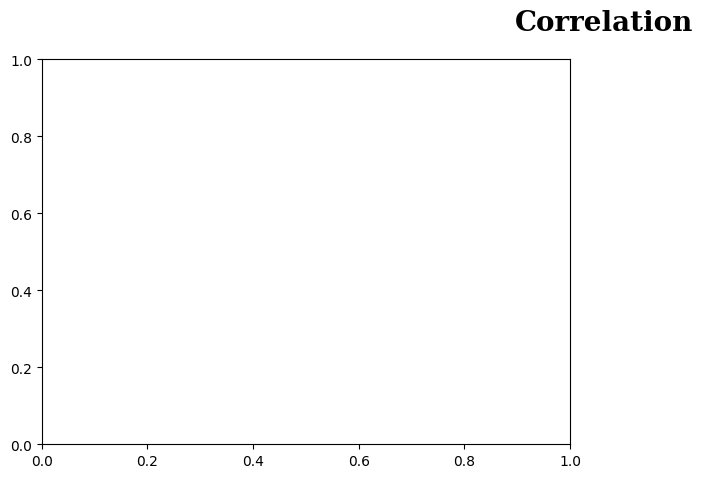

In [3]:
plt.figure(figsize=(15,5))
plt.suptitle('Correlation',fontsize=20,fontfamily='serif',fontweight='bold')

plt.subplot(1,2,1)
sns.heatmap(mdc,cmap='Reds',annot=True)
plt.title('Movies corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.subplot(1,2,2)
sns.heatmap(tvdc,cmap='Greys',annot=True)
plt.title('Tvshows corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

#### 👉Insights:

- The correlation are found to nominal and on an average it is found that data has a `least Positive Correlation` based on the coefficients of Movies and **More likely** `Positively correlated` on the TVShow data.  

🤔🔖💡***Recommendations for `Netflix` Business Growth***:💡🔖🤔

- **Invest in more original content**: Netflix has been very successful with its `original content`. The company should continue to invest in original content that is both high-quality and appealing to a wide **Global audience** collaborating with the famous actors,directors to have a successful growth both contentwise and financially.

- **Expand into new markets**: Netflix is already available in over `190 countries`, but there are still many markets where the company could expand. The company should focus on expanding into markets where there is a large population of potential subscribers and where there is less competition from other streaming services. Prioritizing the contents rating would attract `more subscribers`.

- **Offer a lower-priced ad-supported tier**: Netflix could offer a lower-priced ad-supported tier to attract more subscribers. This would allow the company to reach a wider audience and `Generate more revenue`. These strategic decisions of release date and time would make the viewers count increase rapidly. Having the `ANIME` contents have shown as an interest for many views. 

- **Personalize the user experience**: Netflix could do more to personalize the user experience. This could include recommending content based on a **user's viewing history**, offering different pricing plans based on a user's needs, and providing more localized content on the similar genre's.

- **Improve the user interface**: Netflix's user interface is generally good, but it could be improved. The company could make it easier to find content, especially when the content that is not as popular. The company could also make it easier to switch between different devices.

- **Partner with other companies**: Netflix could partner with other companies to offer `exclusive content` or to promote their services say starting their **own production house** to produce more contents based on likliness of the wide range of audiences and could expand into new genres of content, such as anime, documentaries, or stand-up comedy. This would help the company attract a wider audience.

- **Invest in technology**: Netflix could invest in new technologies, such as virtual reality or augmented reality. This would allow the company to offer new and immersive experiences to their subscribers.

- **Content Management**: Timely release of the contents ensure credibility and earns a good trust among the subscribers. The strategic Decisions of the release weekday , month matters and should be aligned with the viewers expectations.

**`Netflix` is a successful company, but there is always room for improvement**. 

By following these recommendations & suggestions , `NETFLIX` can continue to Grow and attract new subscribers & Stratergize in a more effiecient way to stay ahead of its competition........


**Netflix**'s growth has not been without its challenges. In recent years, the company has faced increased competition from other streaming services, such as Disney+, HBO Max, and Amazon Prime Video. This has led to some declines in subscriber growth.

However, `Netflix` remains one of the ***Most Popular Streaming services** in the *world*. 
The company is well-positioned for future growth, as it continues to invest in original content and expand into new markets.







                                                    - Done by:
                                                            `KASI`